## Importing Libraries

In [1]:
#Load relevant packages
from glob import glob
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
import math

## Getting all file names of dataset folder

In [2]:
files = glob('./40_stocks_dataset/*')
fnames=[]
for n in files:
    fnames.append(n)

In [3]:
# Loading first stock data excel file.
df=pd.read_excel(fnames[0])

C:\Anaconda3\envs\test\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  


In [4]:
fnames[0]
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-09-26,48.000000,48.680000,47.439999,48.255001,38.353802,415947
1,2016-09-27,48.400002,49.889999,48.400002,49.889999,39.653320,556386
2,2016-09-28,50.060001,51.320000,50.020000,50.930000,40.479931,435688
3,2016-09-29,51.529999,51.630001,50.970001,51.200001,40.694530,313980
4,2016-09-30,50.509998,52.799999,50.340000,52.630001,41.831112,636219
...,...,...,...,...,...,...,...
1261,2021-09-17,57.779999,58.240002,56.580002,57.020000,57.020000,1729846
1262,2021-09-20,56.000000,56.119999,54.599998,54.840000,54.840000,1188551
1263,2021-09-21,55.299999,55.480000,54.400002,54.480000,54.480000,837265
1264,2021-09-22,54.980000,55.540001,54.439999,55.340000,55.340000,740907


In [5]:
#getting stock Name of first Stock Data File
stockName=fnames[0]
stockName=stockName.replace('./40_stocks_dataset\\','')
stockName=stockName.replace('.DE.xlsx','')
stockName

'1COV'

In [6]:
# Selecting main Columns to preprare data
df=df[['Date','Adj Close']]


In [7]:
# Setting date column as index
df = df.set_index(['Date'])
df

,Adj Close
Date,
2016-09-26,38.353802
2016-09-27,39.653320
2016-09-28,40.479931
2016-09-29,40.694530
2016-09-30,41.831112
...,...
2021-09-17,57.020000
2021-09-20,54.840000
2021-09-21,54.480000


In [8]:
# rename Adj close by Stock Name
df = df.rename(columns = {'Adj Close': stockName}, inplace = False)


In [9]:
# showing head ho first stock data(Adj close)
df.head()

,1COV
Date,
2016-09-26,38.353802
2016-09-27,39.653320
2016-09-28,40.479931
2016-09-29,40.694530
2016-09-30,41.831112


## Combining all stock data in one data frame

In [10]:
# Preparing all other stock data like above and  appending to the main data frame
for i in range(1,40):
    df1=pd.read_excel(fnames[i])
    stockName=fnames[i]
    stockName=stockName.replace('./40_stocks_dataset\\','')
    stockName=stockName.replace('.DE.xlsx','')
    if(1266!=len(df1)):
        print(stockName)
        continue
    df1=df1[['Date','Adj Close']]
    df1 = df1.rename(columns = {'Adj Close': stockName}, inplace = False)
    temp_data= df1[stockName]
    new_Data=list(temp_data)
    df[stockName]=new_Data
    
print("The Stock those are droped because of low data:")    
df    #Final Data frame.


C:\Anaconda3\envs\test\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  This is separate from the ipykernel package so we can avoid doing imports until


DHER
ENR
HFG
SHL
The Stock those are droped because of low data:


,1COV,ADS,AIR,ALV,BAS,BAYN,BMW,BNR,DAI,DB1,...,QIA,RWE,SAP,SIE,SRT3,SY1,VNA,VOW3,ZAL,_CON
Date,,,,,,,,,,,,,,,,,,,,,
2016-09-26,38.353802,141.091370,48.469830,104.611366,53.716393,71.446533,58.250198,42.302158,48.472401,64.348381,...,23.282160,12.206214,73.750374,88.297562,71.750122,60.762253,28.323410,102.050995,36.740002,155.464813
2016-09-27,39.653320,140.216736,48.064381,102.950867,53.627449,71.110115,57.815678,42.132591,48.174732,63.739807,...,23.914907,12.036396,74.107841,88.425331,71.535446,60.874649,28.630590,99.416290,36.400002,155.214737
2016-09-28,40.479931,143.208893,48.626488,104.057869,54.146233,71.494583,58.210697,43.011654,48.613400,63.587666,...,24.014553,12.371892,74.575317,88.638313,72.364868,61.520958,28.472843,100.601913,36.345001,156.006653
2016-09-29,40.694530,141.413605,49.216236,103.820648,55.109688,70.725647,58.226501,43.573898,48.644733,63.793499,...,23.885015,12.715672,74.007019,87.956810,71.945290,60.874649,28.020369,101.480148,36.500000,155.006363
2016-09-30,41.831112,142.242188,49.759907,104.453217,56.406654,71.630745,59.103451,43.377563,49.122562,62.173607,...,24.418118,12.703244,74.172012,88.766090,72.286812,61.099453,27.983013,102.709679,37.150002,156.006653
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-17,57.020000,282.350006,113.440002,190.779999,63.090000,45.209999,80.360001,83.360001,71.360001,140.000000,...,45.759998,31.969999,122.080002,149.520004,564.599976,116.349998,52.919998,189.699997,95.580002,95.889999
2021-09-20,54.840000,280.299988,111.980003,183.919998,61.770000,45.270000,77.889999,81.040001,69.150002,139.399994,...,46.540001,32.130001,118.959999,141.979996,559.000000,117.449997,52.279999,181.000000,90.720001,90.680000
2021-09-21,54.480000,282.600006,113.339996,187.619995,62.389999,45.814999,78.919998,82.519997,69.300003,144.649994,...,46.830002,32.150002,121.279999,146.020004,577.799988,119.550003,53.459999,183.199997,87.980003,91.169998


# Data Preparation

Data preparation and processing are just as crucial as the analysis itself. Scale, smooth, and use the derivative of the data are doing below studies show that using the derivative of the closing prices give best result.

In [11]:
Window_Size=1
df = (df - df.median())/df.std()      #Scale Data
Scaled_data = df.copy()    
#Smooth Data
df = df.rolling(window=Window_Size).mean()
df = df[(Window_Size-1):]        
#Get Derivative of data
df = df.diff(axis=0)
df = df[1:]
Final_Data=df

In [12]:
Final_Data

,1COV,ADS,AIR,ALV,BAS,BAYN,BMW,BNR,DAI,DB1,...,QIA,RWE,SAP,SIE,SRT3,SY1,VNA,VOW3,ZAL,_CON
Date,,,,,,,,,,,,,,,,,,,,,
2016-09-27,0.106237,-0.016388,-0.017802,-0.064625,-0.010143,-0.020397,-0.046242,-0.014199,-0.026473,-0.022913,...,0.101179,-0.022632,0.021548,0.008185,-0.001574,0.005520,0.030605,-0.091975,-0.016038,-0.006728
2016-09-28,0.067576,0.056063,0.024681,0.043083,0.059164,0.023311,0.042038,0.073612,0.039013,-0.005728,...,0.015934,0.044712,0.028180,0.013644,0.006081,0.031741,-0.015717,0.041389,-0.002594,0.021307
2016-09-29,0.017544,-0.033638,0.025894,-0.009232,0.109875,-0.046621,0.001682,0.047082,0.002787,0.007750,...,-0.020714,0.045816,-0.034257,-0.043660,-0.003076,-0.031741,-0.045081,0.030658,0.007311,-0.026913
2016-09-30,0.092917,0.015525,0.023871,0.024619,0.147910,0.054877,0.093325,-0.016441,0.042496,-0.060989,...,0.085245,-0.001656,0.009946,0.051845,0.002504,0.011040,-0.003722,0.042922,0.030661,0.026913
2016-10-04,-0.014944,0.050025,0.034796,0.026158,0.124243,0.029138,0.208511,0.099021,0.115645,0.019880,...,-0.002390,-0.007176,0.030389,0.068218,0.005580,0.028981,-0.033087,0.050586,0.035378,0.034762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-17,-0.094831,-0.057147,-0.068496,-0.063049,-0.228085,-0.026071,-0.181979,-0.122259,-0.068480,-0.103537,...,0.015990,-0.070634,-0.025318,-0.016656,-0.004399,-0.213632,-0.027897,-0.131956,0.074531,0.026905
2021-09-20,-0.178218,-0.038411,-0.064105,-0.266985,-0.150537,0.003638,-0.262858,-0.194275,-0.196546,-0.022590,...,0.124726,0.021324,-0.188075,-0.483040,-0.041054,0.054022,-0.063765,-0.303708,-0.229252,-0.140175
2021-09-21,-0.029430,0.043095,0.059714,0.144000,0.070707,0.033044,0.109613,0.123934,0.013340,0.197662,...,0.046372,0.002666,0.139851,0.258817,0.137826,0.103133,0.117566,0.076800,-0.129249,0.013183


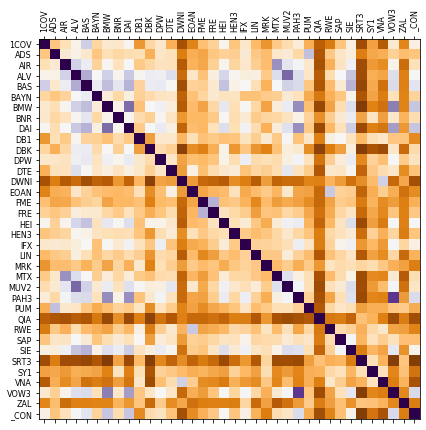

In [13]:
#find correlation matrix, i.e. the "distances" between each stock
correlation_data = Final_Data.corr()
size = 7
# Showing heatmap of correlation of stocks with eachother
fig, ax = plt.subplots(figsize=(size, size))
ax.matshow(correlation_data,cmap=cm.get_cmap('PuOr'), vmin=0,vmax=1)
plt.xticks(range(len(correlation_data.columns)), correlation_data.columns, rotation='vertical', fontsize=8);
plt.yticks(range(len(correlation_data.columns)), correlation_data.columns, fontsize=8);

by visualization of coorelation heat map we can easily see that correlation between VOW3 and PAH3 is really higher than all others

# Clusters of Correlation Agglomerate

In [14]:
# For visualizing of dendogram getting linkage of average correlation
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(correlation_data, 'average')
Z[0]

array([24.        , 33.        ,  0.20468856,  2.        ])

# Cophenetic Correlation coefficient

It's critical to determine how well the clustering works. The Cophenetic Correlation Coefficient C is one metric. This compares (correlates) all of your samples' actual pairwise distances to those implied by hierarchical clustering. The closer C is to 1, the better the original distances are preserved during clustering. In general, a good cluster fit is defined as C > 0.7.

In [15]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
import pylab
C, coph_dists = cophenet(Z, pdist(correlation_data))
C

0.8267199437741545

# Hierarchical Clustering Dendrogram

 A dendogram, which depicts a cluster tree with the leaves representing individual stocks and the root representing the final single cluster, is the best way to illustrate an agglomerate clustering technique. The y-axis shows the "distance" between each cluster, and the longer the branches are, the less associated two clusters are.

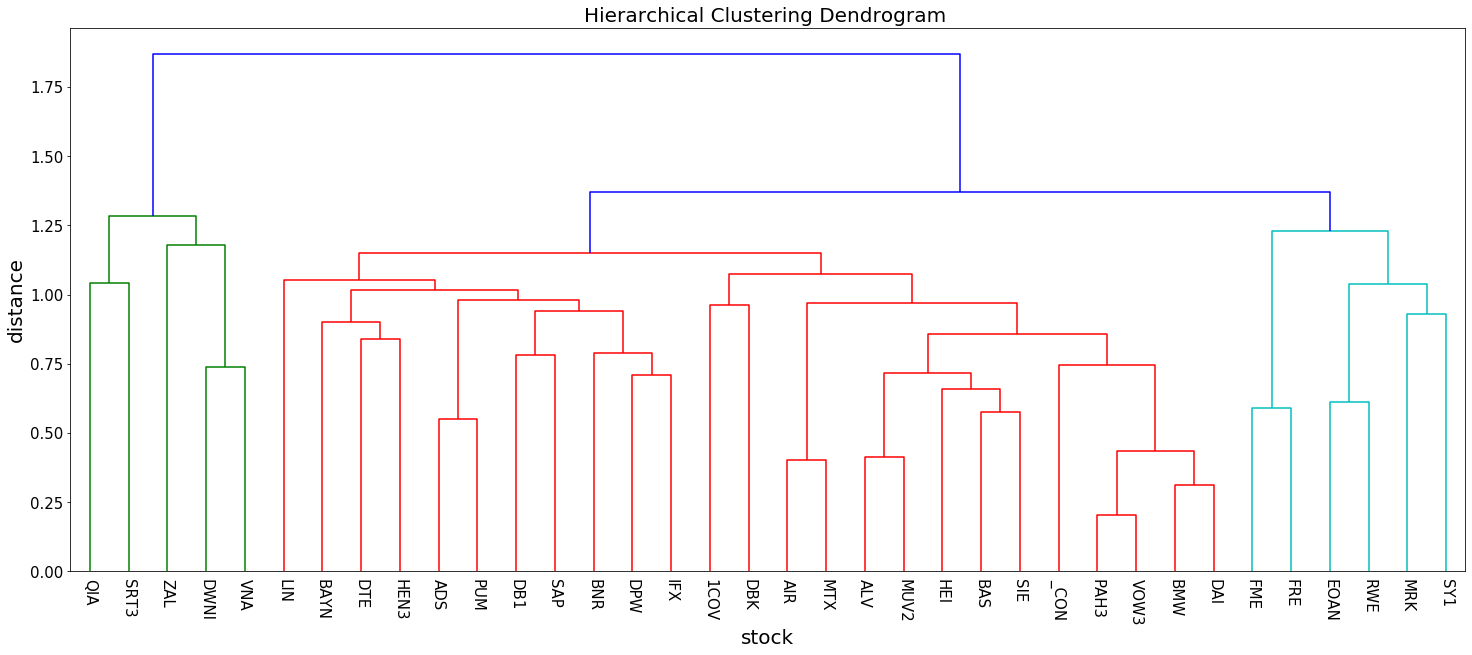

In [16]:
plt.figure(figsize=(25, 10))
labelsize=20
ticksize=15
plt.title('Hierarchical Clustering Dendrogram ', fontsize=labelsize)
plt.xlabel('stock', fontsize=labelsize)
plt.ylabel('distance', fontsize=labelsize)
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
    labels = correlation_data.columns
)
pylab.yticks(fontsize=ticksize)
pylab.xticks(rotation=-90, fontsize=ticksize)
plt.show()

The two most associated equities, according to the dendogram above, are "PAH3" and "VOW3". First and foremost, does this make intuitive sense? Looking at PAH3 and VOW3, it appears that they both have good relation, as a result. Let's visualise how well they correspond by plotting them below. Furthermore, let's compare two stocks that aren't at all associated, such as "LIN" and "ZAL".

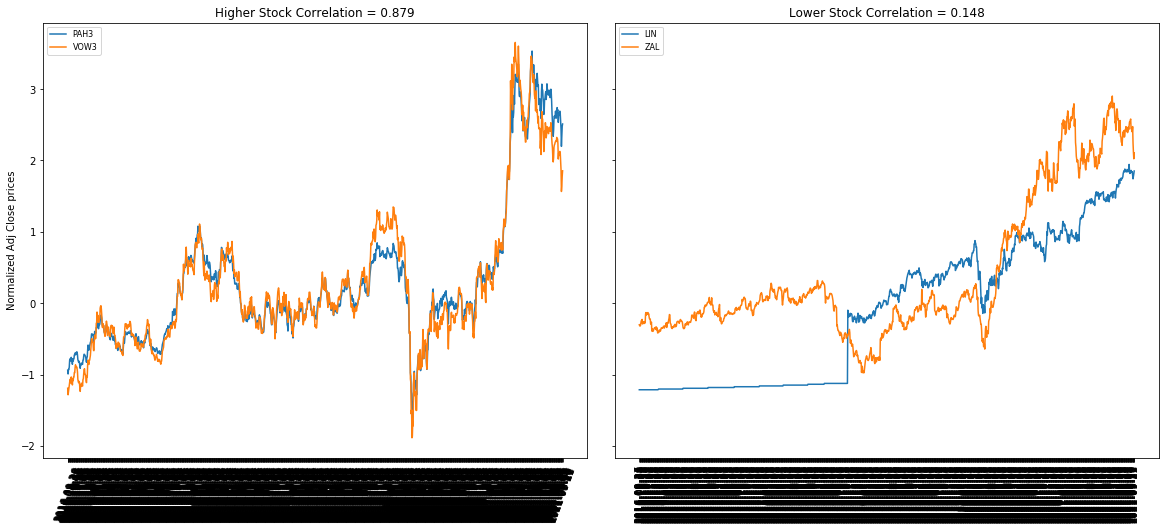

In [17]:

#plot sample correlations

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,8), sharey=True)
plt.subplots_adjust(wspace=0.05)

stockA = "PAH3"
#high correlation
stockB = "VOW3"
ax1.plot(Scaled_data[stockA],label=stockA)
ax1.plot(Scaled_data[stockB],label=stockB)
ax1.set_title('Higher Stock Correlation = %.3f'%correlation_data[stockA][stockB])
ax1.set_ylabel('Normalized Adj Close prices')
ax1.legend(loc='upper left',prop={'size':8})
plt.setp(ax1.get_xticklabels(), rotation=70);

#low correlation
stockX = "LIN"
stockY = "ZAL"
ax2.plot(Scaled_data[stockX],label=stockX)
ax2.plot(Scaled_data[stockY],label=stockY)
ax2.set_title('Lower Stock Correlation = %.3f'%correlation_data[stockX][stockY])
ax2.legend(loc='upper left',prop={'size':8})
plt.setp(ax2.get_xticklabels(), rotation=90);

In line plot Visualization we can easily see they have good coorelation with eachother thats all

In [18]:
Final_Data

COV=pd.read_excel(fnames[0])
ADS=pd.read_excel(fnames[1])
AIR=pd.read_excel(fnames[2])


C:\Anaconda3\envs\test\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Anaconda3\envs\test\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  after removing the cwd from sys.path.
C:\Anaconda3\envs\test\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl in

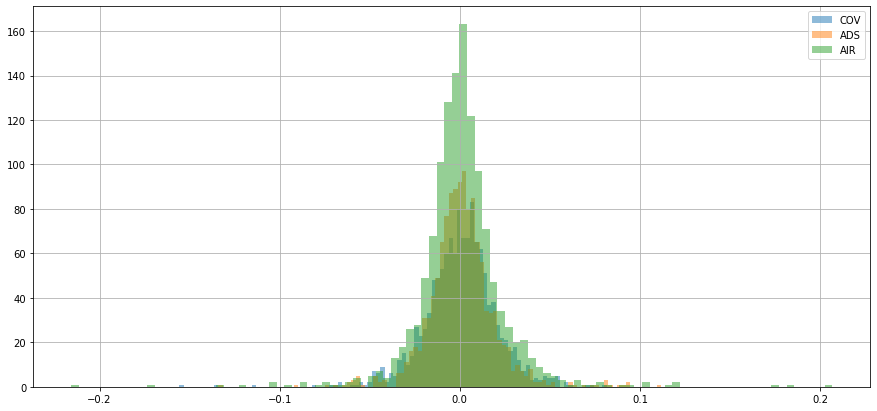

In [19]:
#Volatility on Adjusant Closing
COV['returns'] = (COV['Adj Close']/COV['Adj Close'].shift(1)) -1
ADS['returns'] = (ADS['Adj Close']/ADS['Adj Close'].shift(1))-1
AIR['returns'] = (AIR['Adj Close']/AIR['Adj Close'].shift(1)) - 1

COV['returns'].hist(bins = 100, label = 'COV', alpha = 0.5, figsize = (15,7))
ADS['returns'].hist(bins = 100, label = 'ADS', alpha = 0.5)
AIR['returns'].hist(bins = 100, label = 'AIR', alpha = 0.5)
plt.legend()

In [20]:
cols=list(Final_Data.columns)

In [21]:
Stocks=[]
for i in range(len(cols)):
    Stocks.append(pd.read_excel(fnames[i]))

C:\Anaconda3\envs\test\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  This is separate from the ipykernel package so we can avoid doing imports until


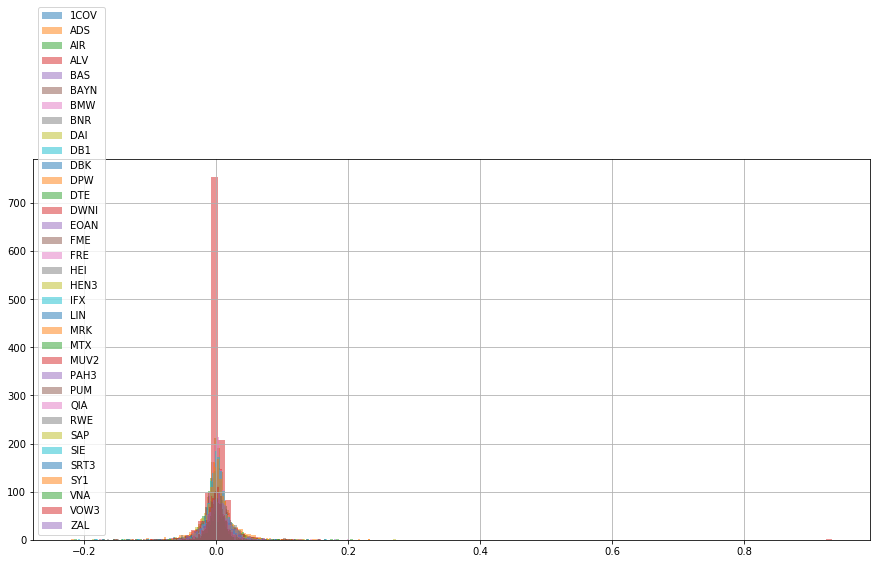

In [22]:
#Volatility
for i in range(len(cols)):
    Stocks[i]['returns'] = (Stocks[i]['Adj Close']/Stocks[i]['Adj Close'].shift(1)) -1
Stocks[0]['returns'].hist(bins = 100, label = cols[0], alpha = 0.5, figsize = (15,7))
for i in range(1,len(cols)):
    Stocks[i]['returns'].hist(bins = 100, label = cols[i], alpha = 0.5)
plt.legend()

# Volatality of all stocks

In [23]:

for i in range(len(cols)):
    print("********",cols[i]," Volatality ********")
    daily_volatility = Stocks[i]['returns'].std()
    print('Daily volatility: ', '{:.2f}%'.format(daily_volatility))

    monthly_volatility = math.sqrt(21) * daily_volatility
    print ('Monthly volatility: ', '{:.2f}%'.format(monthly_volatility))

    annual_volatility = math.sqrt(252) * daily_volatility
    print ('Annual volatility: ', '{:.2f}%'.format(annual_volatility ))

******** 1COV  Volatality ********
Daily volatility:  0.02%
Monthly volatility:  0.09%
Annual volatility:  0.33%
******** ADS  Volatality ********
Daily volatility:  0.02%
Monthly volatility:  0.09%
Annual volatility:  0.30%
******** AIR  Volatality ********
Daily volatility:  0.03%
Monthly volatility:  0.11%
Annual volatility:  0.40%
******** ALV  Volatality ********
Daily volatility:  0.02%
Monthly volatility:  0.07%
Annual volatility:  0.24%
******** BAS  Volatality ********
Daily volatility:  0.02%
Monthly volatility:  0.07%
Annual volatility:  0.26%
******** BAYN  Volatality ********
Daily volatility:  0.02%
Monthly volatility:  0.09%
Annual volatility:  0.30%
******** BMW  Volatality ********
Daily volatility:  0.02%
Monthly volatility:  0.08%
Annual volatility:  0.27%
******** BNR  Volatality ********
Daily volatility:  0.02%
Monthly volatility:  0.07%
Annual volatility:  0.25%
******** DAI  Volatality ********
Daily volatility:  0.02%
Monthly volatility:  0.10%
Annual volatilit

# Volatality of higher correlation stocks

In [24]:

print("******** PAH3  Volatality ********")
daily_volatility = Stocks[cols.index('PAH3')]['returns'].std()
print('Daily volatility: ', '{:.2f}%'.format(daily_volatility))

monthly_volatility = math.sqrt(21) * daily_volatility
print ('Monthly volatility: ', '{:.2f}%'.format(monthly_volatility))

annual_volatility = math.sqrt(252) * daily_volatility
print ('Annual volatility: ', '{:.2f}%'.format(annual_volatility ))

print("******** VOW3  Volatality ********")
daily_volatility = Stocks[cols.index('VOW3')]['returns'].std()
print('Daily volatility: ', '{:.2f}%'.format(daily_volatility))

monthly_volatility = math.sqrt(21) * daily_volatility
print ('Monthly volatility: ', '{:.2f}%'.format(monthly_volatility))

annual_volatility = math.sqrt(252) * daily_volatility
print ('Annual volatility: ', '{:.2f}%'.format(annual_volatility ))

******** PAH3  Volatality ********
Daily volatility:  0.01%
Monthly volatility:  0.07%
Annual volatility:  0.23%
******** VOW3  Volatality ********
Daily volatility:  0.02%
Monthly volatility:  0.07%
Annual volatility:  0.25%


# Cluster 1 stocks volatality

In [25]:
cluster1=['QIA','SRT3','ZAL',"DWNI","VNA"]

for i in range(len(cluster1)):
    print("********",cluster1[i]," Volatality ********")
    daily_volatility = Stocks[cols.index(cluster1[i])]['returns'].std()
    print('Daily volatility: ', '{:.2f}%'.format(daily_volatility))

    monthly_volatility = math.sqrt(21) * daily_volatility
    print ('Monthly volatility: ', '{:.2f}%'.format(monthly_volatility))

    annual_volatility = math.sqrt(252) * daily_volatility
    print ('Annual volatility: ', '{:.2f}%'.format(annual_volatility ))

******** QIA  Volatality ********
Daily volatility:  0.02%
Monthly volatility:  0.07%
Annual volatility:  0.26%
******** SRT3  Volatality ********
Daily volatility:  0.02%
Monthly volatility:  0.09%
Annual volatility:  0.29%
******** ZAL  Volatality ********
Daily volatility:  0.02%
Monthly volatility:  0.10%
Annual volatility:  0.35%
******** DWNI  Volatality ********
Daily volatility:  0.01%
Monthly volatility:  0.05%
Annual volatility:  0.19%
******** VNA  Volatality ********
Daily volatility:  0.02%
Monthly volatility:  0.07%
Annual volatility:  0.26%


# Cluster 2 stocks volatality

In [26]:
cluster2=['LIN','BAYN','DTE',"HEN3","ADS",'PUM','DB1','SAP',"BNR","DPW",
          'IFX','1COV','DBK',"AIR","MTX",'ALV','MUV2','HEI',"BAS","SIE",
          "_CON","PAH3",'VOW3','BMW','DAI']
for i in range(len(cluster2)):
    print("********",cluster2[i]," Volatality ********")
    daily_volatility = Stocks[cols.index(cluster2[i])]['returns'].std()
    print('Daily volatility: ', '{:.2f}%'.format(daily_volatility))

    monthly_volatility = math.sqrt(21) * daily_volatility
    print ('Monthly volatility: ', '{:.2f}%'.format(monthly_volatility))

    annual_volatility = math.sqrt(252) * daily_volatility
    print ('Annual volatility: ', '{:.2f}%'.format(annual_volatility ))

******** LIN  Volatality ********
Daily volatility:  0.01%
Monthly volatility:  0.06%
Annual volatility:  0.20%
******** BAYN  Volatality ********
Daily volatility:  0.02%
Monthly volatility:  0.09%
Annual volatility:  0.30%
******** DTE  Volatality ********
Daily volatility:  0.02%
Monthly volatility:  0.07%
Annual volatility:  0.24%
******** HEN3  Volatality ********
Daily volatility:  0.02%
Monthly volatility:  0.08%
Annual volatility:  0.29%
******** ADS  Volatality ********
Daily volatility:  0.02%
Monthly volatility:  0.09%
Annual volatility:  0.30%
******** PUM  Volatality ********
Daily volatility:  0.02%
Monthly volatility:  0.11%
Annual volatility:  0.38%
******** DB1  Volatality ********
Daily volatility:  0.01%
Monthly volatility:  0.07%
Annual volatility:  0.23%
******** SAP  Volatality ********
Daily volatility:  0.02%
Monthly volatility:  0.10%
Annual volatility:  0.33%
******** BNR  Volatality ********
Daily volatility:  0.02%
Monthly volatility:  0.07%
Annual volatilit

# Cluster 3 stocks volatality

In [27]:
cluster3=['FME','FRE','EOAN',"RWE","MRK",'SY1']
for i in range(len(cluster3)):
    print("********",cluster3[i]," Volatality ********")
    daily_volatility = Stocks[cols.index(cluster3[i])]['returns'].std()
    print('Daily volatility: ', '{:.2f}%'.format(daily_volatility))

    monthly_volatility = math.sqrt(21) * daily_volatility
    print ('Monthly volatility: ', '{:.2f}%'.format(monthly_volatility))

    annual_volatility = math.sqrt(252) * daily_volatility
    print ('Annual volatility: ', '{:.2f}%'.format(annual_volatility ))

******** FME  Volatality ********
Daily volatility:  0.02%
Monthly volatility:  0.11%
Annual volatility:  0.37%
******** FRE  Volatality ********
Daily volatility:  0.01%
Monthly volatility:  0.06%
Annual volatility:  0.22%
******** EOAN  Volatality ********
Daily volatility:  0.01%
Monthly volatility:  0.07%
Annual volatility:  0.23%
******** RWE  Volatality ********
Daily volatility:  0.02%
Monthly volatility:  0.10%
Annual volatility:  0.33%
******** MRK  Volatality ********
Daily volatility:  0.03%
Monthly volatility:  0.15%
Annual volatility:  0.51%
******** SY1  Volatality ********
Daily volatility:  0.02%
Monthly volatility:  0.07%
Annual volatility:  0.25%


# Cluster 1 stocks volatality for threshold 0.83

In [28]:
print("******** DWNI  Volatality ********")
daily_volatility = Stocks[cols.index('DWNI')]['returns'].std()
print('Daily volatility: ', '{:.2f}%'.format(daily_volatility))

monthly_volatility = math.sqrt(21) * daily_volatility
print ('Monthly volatility: ', '{:.2f}%'.format(monthly_volatility))

annual_volatility = math.sqrt(252) * daily_volatility
print ('Annual volatility: ', '{:.2f}%'.format(annual_volatility ))

print("******** VNA  Volatality ********")
daily_volatility = Stocks[cols.index('VNA')]['returns'].std()
print('Daily volatility: ', '{:.2f}%'.format(daily_volatility))

monthly_volatility = math.sqrt(21) * daily_volatility
print ('Monthly volatility: ', '{:.2f}%'.format(monthly_volatility))

annual_volatility = math.sqrt(252) * daily_volatility
print ('Annual volatility: ', '{:.2f}%'.format(annual_volatility ))

******** DWNI  Volatality ********
Daily volatility:  0.01%
Monthly volatility:  0.05%
Annual volatility:  0.19%
******** VNA  Volatality ********
Daily volatility:  0.02%
Monthly volatility:  0.07%
Annual volatility:  0.26%
